# TFY4345 Klassisk Mekanikk - Øving 2: Pendel

### Høst 2019

av Thomas Parelius

NTNU Trondheim, 2019 - 11 - 01

In [61]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [160]:
#definerer initielle verdier og arrayer:
import math
import numpy as np
import matplotlib.pyplot as plt

#Initial values
l = 1;
m = 1;
g = 9.81;
theta0 = 0.2;
omega0 = 0.0;
F_D = 0.2;
phi = math.pi/2;
omega_const = math.sqrt(g/l);

#Initialising time- step and array
sek = 20.0;
dt = 0.01
t = np.arange(0.0, sek+dt, dt);
N = len(t);

#Potensiell energi/startverdi
beta = (math.pi - theta0)/(2.0);
h=2*math.cos(beta)**2;
E0 = m * g * h;

#### Her følger et par funksjoner som regner ut underdempet-, overdempet- og kritisk dempet bevegelse. Først via de analytiske formlene oppgitt i pdf-filen vi ble gitt, så via Runge-Kutta 4. Disse blir så plottet med tre ulike q-verdier slik at man kan sammenlikne den analytiske og den numeriske løsningen for hver q-verdi. Arbeid gjort av dempingen blir også plottet for hver q-verdi, igjen med analytisk og numerisk løsning i samme plot for enklere sammenlikning.

In [161]:
#Underdamping, analytiske beregniger:
import math
import numpy as np
import matplotlib.pyplot as plt

def under(q):
    
    #Initialisering av arrays
    theta = np.zeros(N);
    omega = np.zeros(N);
    E = np.zeros(N);
    
    #Forenklingskonstant
    k = math.sqrt(omega_const**2 - 0.25*q**2);
    
    #Regner ut theta, omega, og energi
    for i in range(0, N):
        theta[i] = theta0*math.exp(-q*t[i]/2.0)*math.sin(phi + math.sqrt(omega_const**2 - (q**2)/4.0)*t[i]);
        omega[i] = theta0*math.exp(-0.5*q*t[i])*(-0.5*q*math.sin(k*t[i]+phi) + k*math.cos(k*t[i]+phi));
        E[i] = 0.5*m*l**2.0*(omega[i]**2.0 + omega_const**2*theta[i]**2.0);
    
    #Utregning av arbeid gjort av friksjon
    work = np.zeros(N);
    for i in range(0, N):
        work[i] = E0 - E[i];
        
    return theta, work;

In [162]:
#Critical damping, analytiske beregninger:
import math
import numpy as np
import matplotlib.pyplot as plt

def critical(q):   
    
    #Initialisering av arrays
    theta = np.zeros(N);
    omega = np.zeros(N);
    E = np.zeros(N);
    C = 1.0;
    
    #Regner ut theta, omega, og energi
    for i in range(0, N):
        theta[i] = (theta0 + t[i]*C)*math.exp(-0.5*q*t[i]);
        omega[i] = math.exp(-0.5*q*t[i])*(C-0.5*q*(theta0+C*t[i]));
        E[i] = 0.5*m*l**2.0*(omega[i]**2.0 + (g/l)*theta[i]**2.0);
    
    #Utregning av arbeid gjort av friksjon
    work = np.zeros(N);
    for i in range(0, N):
        work[i] = E0 - E[i];
    
    return theta, work;

In [163]:
#Overdamping, analytiske beregninger:
import math
import numpy as np
import matplotlib.pyplot as plt

def over(q):
        
    #Initialisering av arrays
    theta = np.zeros(N);
    omega = np.zeros(N);
    E = np.zeros(N);

    k = math.sqrt(0.25*q**2 - omega_const**2);
    
    #Regner ut theta, omega, og energi
    for i in range(0, N):
        theta[i] = theta0*math.exp(-t[i]*(q/2 - k));
        omega[i] = theta0*math.exp(-t[i]*(0.5*q + k))*(0.5*q - k);
        E[i] = 0.5*m*l**2.0*(omega[i]**2.0 + (g/l)*theta[i]**2.0);
    
    #Utregning av arbeid gjort av friksjon
    work = np.zeros(N);
    for i in range(0, N):
        work[i] = E0 - E[i];
    
    return theta, work;   

In [164]:
#Runge-Kutta 4 beregninger:
import math
import numpy as np
import matplotlib.pyplot as plt

def rk4(q):
    
    #Initialisering av arrays
    theta = np.zeros(N);
    theta[0] = theta0;
    omega = np.zeros(N);
    omega[0] = omega0;
    E = np.zeros(N);
    E[0] = E0;
    
    #Konstanter brukt i for-løkken
    C1 = -(omega_const**2);
    C2 = -q;

    #Runge-Kutta 4 algoritme
    for i in range(0, N-1):
        theta_k1 = dt*omega[i];
        theta_k2 = dt*(omega[i] + theta_k1/2.0);
        theta_k3 = dt*(omega[i] + theta_k2/2.0);
        theta_k4 = dt*(omega[i] + theta_k3);
        theta[i+1] = theta[i] + (1/6)*(theta_k1 + 2*theta_k2 + 2*theta_k3 + theta_k4);
                
        Wn = C1*theta[i] + C2*omega[i];
        omega_k1 = dt*Wn;
        omega_k2 = dt*(Wn + omega_k1/2.0);
        omega_k3 = dt*(Wn + omega_k2/2.0);
        omega_k4 = dt*(Wn + omega_k3);
        omega[i+1] = omega[i]+(1/6)*(omega_k1 + 2*omega_k2 + 2*omega_k3+ omega_k4);
        
        E[i+1] = E[i] + m*l*l*(omega[i+1]*(omega[i+1]-omega[i]) + omega_const**2*theta[i+1]*(theta[i+1]-theta[i]));
    
    #Utregning av arbeid gjort av friksjon
    work = np.zeros(N);
    for i in range(0, N):
        work[i] = E0 - E[i];
    
    return theta, work;

In [165]:
#Funksjon som tar inn 2 vektorer og plotter dem i samme plot.
import math
import numpy as np
import matplotlib.pyplot as plt

def plots(alpha, vector1, vector2, title):
    if alpha == 0:
        plt.figure();
        plt.plot(t, vector1, 'b', label="Analytisk løsning");
        plt.plot(t, vector2, 'r', label="Numerisk løsning");
        plt.title(title);
        plt.xlabel('time (s)');
        plt.ylabel('Vinkel theta (rad)');
        plt.axis('auto');
        plt.grid(True);
        plt.legend(loc="lower right", frameon=True);
        plt.show();
    if alpha == 1:
        plt.figure();
        plt.plot(t, vector1, 'b', label="Analytisk løsning");
        plt.plot(t, vector2, 'r', label="Numerisk løsning");
        plt.title(title);
        plt.xlabel('time (s)');
        plt.ylabel('Arbeid gjort av dampingen');
        plt.axis('auto');
        plt.grid(True);
        plt.legend(loc="lower right", frameon=True);
        plt.show();       
    return;

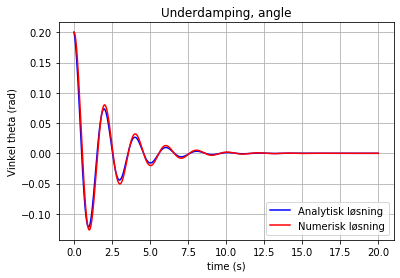

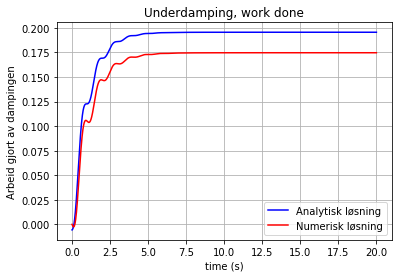

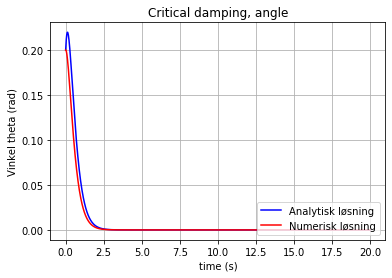

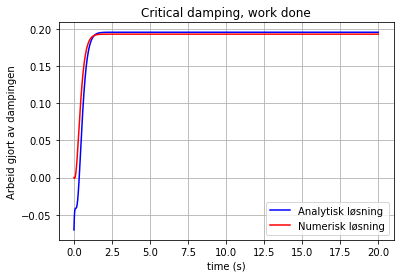

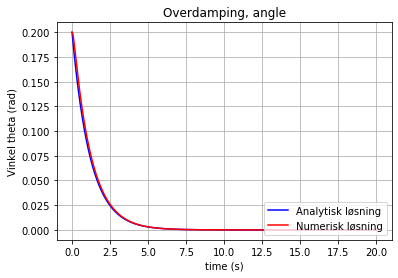

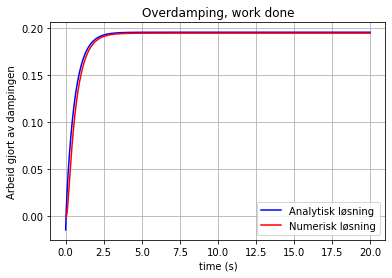

In [166]:

plots(0, under(1.0)[0], rk4(1.0)[0],'Underdamping, angle');
plots(1, under(1.0)[1], rk4(1.0)[1],'Underdamping, work done');

plots(0, critical(2*omega_const)[0], rk4(2*omega_const)[0], 'Critical damping, angle');
plots(1, critical(2*omega_const)[1], rk4(2*omega_const)[1], 'Critical damping, work done');

plots(0, over(4*omega_const)[0], rk4(4*omega_const)[0],'Overdamping, angle');
plots(1, over(4*omega_const)[1], rk4(4*omega_const)[1],'Overdamping, work done');


#### Her følger plots av resonansamplituden som funksjon av frekvensen omega_d, med fire ulike verdier for q-parameteren. Jeg benyttet her formelen for resonansamplituden som ble oppgitt i pdf-filen for å beregne de analytiske verdiene.

In [191]:
#Beregning og plotting av resonansamplituden, analytisk.
import math
import numpy as np
import matplotlib.pyplot as plt

def resonance(q):
    
    amp = np.zeros(N)
    
    #Array bestående av mulige omega_d verdier
    #for-løkken nedenfor går gjennom.
    omega_d = np.zeros(N);
    omega_d = np.arange(0.0, sek+dt, dt);

    for i in range(0,N):
        amp[i] = F_D/math.sqrt((omega_const**2 - omega_d[i]**2)**2 + (q*omega_d[i])**2);
        
    plt.figure();
    plt.plot(omega_d, amp);    
    plt.title('Amplitude over frequency, q= %1.1f'% q);
    plt.xlabel('Frequency (omega_d)');
    plt.ylabel('Amplitude (theta_0)');
    plt.axis('auto');
    plt.grid(True);    
    plt.show();
    return;

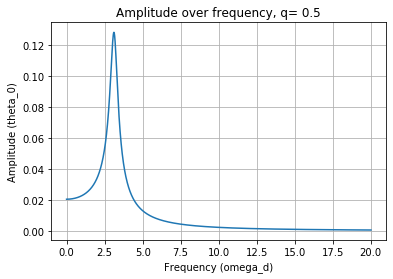

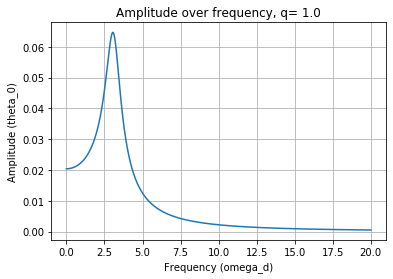

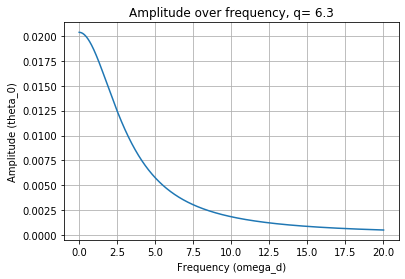

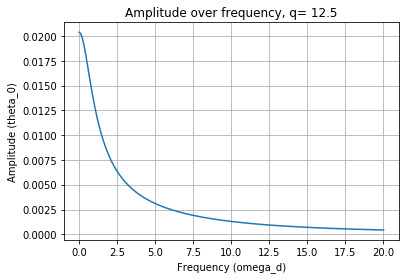

In [192]:
#Plot
resonance(0.5);
resonance(1.0);
resonance(2*omega_const);
resonance(4*omega_const);

Ser her at resonansfrekvensen er lik omega. Og at resonansamplituden er avhengig av både omega_d og q.

#### Her følger en funksjon som beregner pendelen sin vinkel og vinkelhastighet via RK4, og plotter vinkelen som funksjon av tid med varierende omega_d-verdi og konstant q-verdi.

In [175]:
import math
import numpy as np
import matplotlib.pyplot as plt

def numRes(omega_d, q):
    
    #Initialisering av arrays
    
    theta = np.zeros(N);
    theta[0] = theta0;
    omega = np.zeros(N);
    omega[0] = omega0;
    E = np.zeros(N);
    E[0] = E0;
    
    #Runge-Kutta 4 algoritme
    for i in range(0, N-1):
        theta_k1 = dt*omega[i];
        theta_k2 = dt*(omega[i] + theta_k1/2.0);
        theta_k3 = dt*(omega[i] + theta_k2/2.0);
        theta_k4 = dt*(omega[i] + theta_k3);
        theta[i+1] = theta[i] + (1/6)*(theta_k1 + 2*theta_k2 + 2*theta_k3 + theta_k4);
        
        #Forenklingskonstanter
        C1 = -(omega_const**2);
        C2 = -q;
        C3 = F_D*math.sin(omega_d*t[i]);
        Wn = C1*theta[i] + C2*omega[i] +C3;
        
        omega_k1 = dt*Wn;
        omega_k2 = dt*(Wn + omega_k1/2.0);
        omega_k3 = dt*(Wn + omega_k2/2.0);
        omega_k4 = dt*(Wn + omega_k3);
        omega[i+1] = omega[i]+(1/6)*(omega_k1 + 2*omega_k2 + 2*omega_k3+ omega_k4);
            
    #For-løkke som finner den høyeste theta-verdien
    #begynner etter 2.5 sek for å unngå at feil verdier
    #blir tatt med.
    thetaMax = 0;
    for n in range(250, N):
        if theta[n]>thetaMax:
            thetaMax = theta[n];
    return thetaMax, theta;

In [194]:
def thetaTime(omega_d, q):
    theta= numRes(omega_d, q)[1];
    plt.figure();
    plt.plot(t, theta);    
    plt.title('Theta over time, omega_d=%1.1f' % omega_d);
    plt.xlabel('Time (t)');
    plt.ylabel('Vinkel  (theta)');
    plt.axis('auto');
    plt.grid(True);    
    plt.show(); 
    return;

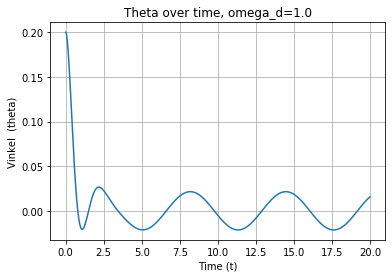

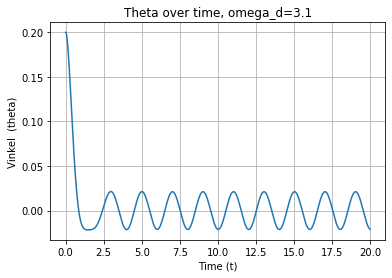

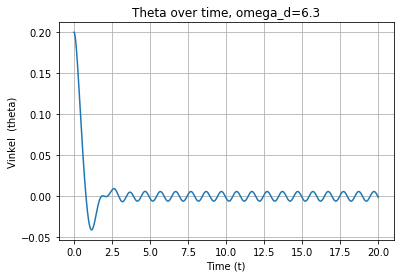

In [195]:
thetaTime(1.0, 1*omega_const);
thetaTime(1*omega_const, 1*omega_const);
thetaTime(2*omega_const, 1*omega_const);

#### Vi ser nedenfor hvordan resonansamplituden varierer med omega_d. Funksjonen thetaMaxPlot() finner maksamplituden til theta for alle mulige omega_d-verdier mellom 0 og 4*omega_d, med presisjon dt, og plotter verdiene over de korresponderende omega_d verdiene.

In [178]:
import numpy as np


def thetaMaxPlot():
    
    A = math.ceil(4.0*omega_const);
    B = np.arange(0.0, A, dt);
    D = len(B);
    
    maxValues = np.zeros(D);
    for i in range (0,D):
        maxValues[i] = numRes(B[i], 1.0)[0];
    
    plt.figure();
    plt.plot(B, maxValues);
    plt.title('Maksimum resonansamplitude over omega_d')
    plt.xlabel('omega_d');
    plt.ylabel('Maksimum resonansamplitude');
    plt.axis('auto');
    plt.grid(True);
    plt.show();
    print('Maksverdien er: ');
    print(np.max(maxValues));
    index_max = np.argmax(maxValues);
    print('For omega_d-verdi: ');
    print(B[index_max]);
    return;

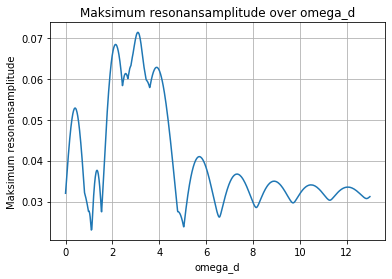

Maksverdien er: 
0.07139396745134206
For omega_d-verdi: 
3.09


In [179]:
thetaMaxPlot(); #Kan ta et par sekunder å kjøre.

Ser fra grafen at maksimum resonansamplitude oppstår når omega_d = 3.09 som stemmer overens med plottene ovenfor og teorien. Resonans får man når omega_d ~= omega. Omega her er (g/l)^(1/2) = 3.13.